# Supplementary material: Weakening and strengthening the local irregularity of digraphs

## S1 Implementation and basic functions

In [7]:
import itertools
import copy

### S1.1 Implemenation of a colored orientation of a graph

We implement a colored oriented graph as a 3-tuple `edgelist, orientation, coloring`. 
See below the implementation of the following colored digraph.

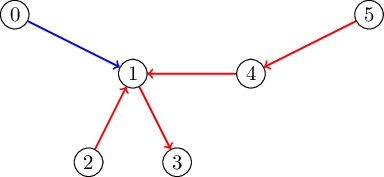

In [32]:
edgelist = [(0,1),(1,2),(1,3),(1,4),(4,5)]
orientation = dict(zip(edgelist,[1,-1,1,-1,-1]))
coloring = dict(zip(edgelist,['b','r','r','r','r']))

**Notes:**
- in general, a vertex $v_i$ is represented by `i` in the code
- edges are always stored as pairs `(u,v)` where `u < v`

### S1.2 Checking if a coloring of (a part of) an oriented graph is strong locally irregular

The function `is_strong_locally_irregular()` serves to check whether a coloring of an oriented graph is strong locally irregular.
We mainly use it to show that a given coloring of edges from `edgelist` except those in `edges_D_prime` extends a strong locally irregular 2-coloring of some subdigraph $D'$ of $D$ to a strong locally irregular 2-coloring of $D$.
This function can be used to check if a coloring of a standalone oriented graph is strong locally irregular, in this case do not specify `edges_D_prime` or `br_D_prime`.

**Input:** 
- `edgelist` is a `list` of edges of a skeleton of a considered configuration
- `o` is a `dict` that stores an orientations of all the edges 
    - `o.keys()` are edges from `edgelist` 
    - `o.values()` are orientations stored as `-1` or `1`
    - `o[(u,v)] == -1` iff the arc is going from `v` to `u`
    - `o[(u,v)] == 1` iff the arc is going from `u` to `v`
- `c` is a `dict` that stores a coloring of all the edgges
    - `c.keys()` are edges from `edgelist`
    - `c.values()` are colors represented by `b` and `r`
    - `c[(u,v)] == b` iff the arc between `u` and `v` is blue
    - `c[(u,v)] == r` iff the arc between `u` and `v` is red
- `edges_D_prime` is a `list` of edges from `edgelist` that lie in $D'$ (i.e., these edges attach to the rest of the digraph $D$, and their end vertices may have different color degrees then the ones calculated from `c`)
- `br_D_prime` is a `dict` that stores the color degrees of end vertices of edges from `edges_D_prime` in the considered coloring of $D$, where the edges from `edgelist` except those from `edges_D_prime` are uncolored
    - `br_D_prime.keys()` are end vertices of edges from `edges_D_prime`
    - `br_D_prime.values()` are pairs (lists of length 2) of the blue and red balanced degrees in the considered coloring of the digraph obtained from $D$ by deleting the edges from `edgelist` except those from `edges_D_prime`
    - `br_D_prime[u] = [b_u,r_u]` where `b_u` and `r_u` are the blue and red balanced degrees of `u` in $D'$, respectively

**Output:**
- the function returns `True` iff the given coloring of $D$ is strong locally irregular considering the values of balanced color degrees of vertices in the coloring of $D'$

In [33]:
def is_strong_locally_irregular(edgelist, o, c, edges_D_prime=list(), br_D_prime=dict()):
    br = copy.deepcopy(br_D_prime)
    
    for e in edgelist:
        if e in edges_D_prime:
            continue
        
        u1, u2 = e
        
        if not u1 in br.keys():
            br[u1] = [0, 0]

        if not u2 in br.keys():
            br[u2] = [0,0]

        if c[e] == 'b':
            br[u1][0] += o[e]
            br[u2][0] -= o[e]
        else:
            br[u1][1] += o[e]
            br[u2][1] -= o[e]
              
    for e in edgelist:
        if (c[e] == 'b' and br[e[0]][0] == br[e[1]][0]) \
                or (c[e] == 'r' and br[e[0]][1] == br[e[1]][1]):
            return False

    return True   

### S1.3 Example

In the following example, consider the following situation:
Somewhere in a digraph $D$, there are six vertices $v_0, \dots, v_6$ joined by arcs $v_1v_0,v_2v_1,v_3v_2,v_4v_1,v_5v_1$.
There are no more arcs incident to $v_1,v_2,v_4,v_5$ in $D$, however, there are more arcs incident to $v_0$ and $v_3$.
Digraph $D'$ is  obtained from $D$ by removing vertices $v_4, v_5$ and the arc $v_2v_1$.
Suppose that there is a strong locally irregular 2-coloring $\varphi'$ of $D'$ in which $v_1v_0$ is blue and $v_3v_2$ is red.
In $\varphi'$ the blue and red balanced degree pairs of $v_1$ and $v_2$ are clearly $(1,0)$ and $(0,-1)$, respectively.
Suppose that the blue and red balanced degree pairs of $v_0$ and $v_3$ are $(3,0)$ and $(0,-2)$, respectively.

It is not hard to see, that if we color the remaining arcs blue, we extend $\varphi'$ to a strong locally irregular 2-coloring of $D$.
However, if we color all the remaining arcs red, the obteined coloring violates the strong locally irregular condition for the arc $v_1v_5$.

The following code shows the implementation of these configurations and the use of function `is_strong_locally_irregular()`.


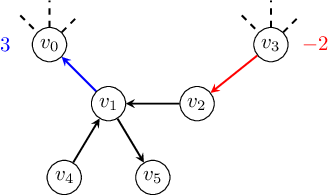

In [34]:
edgelist = [(0, 1), (2, 3), (1, 2), (1, 4), (1, 5)]
o = {(0, 1): -1, (2, 3): -1, (1, 2): -1, (1, 4): -1, (1, 5): 1}
c1 = {(0, 1): 'b', (2, 3): 'r', (1, 2): 'b', (1, 4): 'b', (1, 5): 'b'}
c2 = {(0, 1): 'b', (2, 3): 'r', (1, 2): 'r', (1, 4): 'r', (1, 5): 'r'}
edges_D_prime = [(0,1),(2,3)]
br_D_prime = {0:[3,0], 3:[0,-2],1:[1,0],2:[0,-1]}

# c1 satisfies the strong locally irregular condition 
print(is_strong_locally_irregular(edgelist,o,c1,edges_D_prime,br_D_prime))

# c2 violates the strong locally irregular condition
print(is_strong_locally_irregular(edgelist,o,c2,edges_D_prime,br_D_prime))

True
False


## S2 Proof of Claim 1

In [35]:
edgelist = [(0, 1), (1, 2), (1, 3), (1, 4)]

edges_D1 = [(0, 1), (1, 2)]

for k in [3, 4, 5]:

    edgelist.append((1, k + 2))

    # iterate through all orientations of edges (0,1) and (1,2), all their colorings in D', 
    # and all possible (interesting) color degrees of 0 and 2 in D'

    for o_01, o_12, c_01, c_12, br_0, br_2 in itertools.product([-1, 1], [-1, 1], ['b', 'r'], ['b', 'r'],
                                                                range(-k - 2, k + 4), range(-k - 2, k + 4)):
        br_D1 = {1: [0, 0]}

        if c_01 == 'b':
            br_D1[0] = [br_0, 0]
            br_D1[1][0] += -1 * o_01
        else:
            br_D1[0] = [0, br_0]
            br_D1[1][1] += -1 * o_01

        if c_12 == 'b':
            br_D1[2] = [br_2, 0]
            br_D1[1][0] += o_12
        else:
            br_D1[2] = [0, br_2]
            br_D1[1][1] += o_12

        # rule out colorings of D' which are not strong locally irregular

        if (c_01 == 'b' and br_D1[0][0] == br_D1[1][0]) or (
                c_01 == 'r' and br_D1[0][1] == br_D1[1][1]) \
                or (c_12 == 'b' and br_D1[1][0] == br_D1[2][0]) or (
                c_12 == 'r' and br_D1[1][1] == br_D1[2][1]):
            continue

            # consider every orientation of k pendant arcs attached to 1
        # if there are i pendant arcs ingoing to 1 then there are k-i arcs outgoing from 1

        for i in range(k + 1):
            o = dict(zip(edgelist, [o_01, o_12] + [-1 for j in range(i)] + [1 for j in range(k + 1 - i)]))

            # find a suitable coloring

            has_suitable_coloring = False

            for c_pendant in itertools.product(['b', 'r'], repeat=k):
                c = dict(zip(edgelist, [c_01, c_12] + list(c_pendant)))

                if is_strong_locally_irregular(edgelist, o, c, edges_D1, br_D1):
                    has_suitable_coloring = True
                    break

            if not has_suitable_coloring:
                print("I was not able to find a suitable coloring for this configuration:")
                print("Edges: " + str(edgelist))
                print("Orientation: " + str(o))
                print("Colors of (0,1) and (1,2): " + str(c_01) + ", " + str(c_12))
                print("Color degrees of 0 and 2: " + str(br_0) + ", " + str(br_2))
                print()

print("I finished.")

I finished.


## S3 Proof of Claim 2

In [36]:
for d_1, d_2 in [[4, 4], [4, 3], [4, 2]]:

    # define the edges of the configuration
    # IMPORTANT: edges (0,1) and (2,3) are always the first two edges in 'edgelist' in that order

    edgelist = [(0, 1), (2, 3), (1, 2)]

    edges_D2 = [(0, 1), (2, 3)]

    for i in range(d_1 - 2):
        edgelist.append((1, 4 + i))

    for i in range(d_2 - 2):
        edgelist.append((2, 2 + d_1 + i))

    # iterate through all possible orientations and colorings of (0,1) and (2,3), 
    # and all possible color degrees (in a color of (0,1) and (2,3), respectively) of 0 and 3 in the coloring of D_2

    for o_01, o_23, c_01, c_23, br_0, br_3 in itertools.product([-1, 1], [-1, 1], ['b', 'r'], ['b', 'r'],
                                                                range(-d_1, d_1 + 2), range(-d_2, d_2 + 2)):

        # create a dict which stores the considered color degrees of 0 and 3 in D_2
        # this is to be used as input of is_strong_locally_irregular()

        br_D2 = dict()

        if c_01 == 'b':
            br_D2[0] = [br_0, 0]
            br_D2[1] = [-1 * o_01, 0]
        else:
            br_D2[0] = [0, br_0]
            br_D2[1] = [0, -1 * o_01]

        if c_23 == 'b':
            br_D2[3] = [br_3, 0]
            br_D2[2] = [o_23, 0]
        else:
            br_D2[3] = [0, br_3]
            br_D2[2] = [0, o_23]

        # rule out colorings of D_2 which are not strong locally irregular

        if (c_01 == 'b' and br_D2[0][0] == br_D2[1][0]) or (
                c_01 == 'r' and br_D2[0][1] == br_D2[1][1]) \
                or (c_23 == 'b' and br_D2[2][0] == br_D2[3][0]) or (
                c_23 == 'r' and br_D2[2][1] == br_D2[3][1]):
            continue

        # iterate through every possible orientation of the remaining edges,
        # and search for a coloring which satisfies the strong locally irregular condition,
        # while considering the color degrees of 0, 1, 2, and 3 in D_2

        for o in itertools.product([-1, 1], repeat=len(edgelist) - 2):

            has_suitable_coloring = False

            for c_rest in itertools.product(['b', 'r'], repeat=len(edgelist) - 2):

                if is_strong_locally_irregular(edgelist, dict(zip(edgelist, [o_01, o_23] + list(o))),
                                               dict(zip(edgelist, [c_01, c_23] + list(c_rest))), edges_D2,
                                               br_D2):
                    has_suitable_coloring = True
                    break

            if not has_suitable_coloring:
                print("I found a case that I cannot solve:")
                print("Edges: " + str(edgelist))
                print("Orientation: " + str(dict(zip(edgelist, [o_01, o_23] + list(o)))))
                print("Colors of (0,1) and (2,3): " + str(c_01) + ", " + str(c_23))
                print("Color degrees of 0 and 3: " + str(br_0) + ", " + str(br_3))
                print()

print("I finished.")

I finished.


## S4 Proof of Claim 3

In [37]:
# define the edges of the configuration
# IMPORTANT: edges (0,1) and (2,3) are the first two edges in 'edgelist' in that order

edgelist = [(0,1),(2,3),(1,2),(1,4),(2,5)]

edges_D3 = [(0,1),(2,3)]

# iterate through all possible orientations and colorings of (0,1) and (2,3), 
# and all possible color degrees (in a color of (0,1) and (2,3), respectively) of 0 and 3 in the coloring of D'

for o_01, o_23, c_01, c_23, br_0, br_3 in itertools.product([-1,1],[-1,1],['b','r'],['b','r'],range(-3,5),range(-3,5)):

    # create a dict which stores the considered color degrees of 0 and 3 in D_3
    # this is to be used as input of is_strong_locally_irregular()

    br_D3 = dict()

    if c_01 == 'b':
        br_D3[0] = [br_0,0]
        br_D3[1] = [-1*o_01,0]
    else:
        br_D3[0] = [0,br_0]
        br_D3[1] = [0,-1*o_01]

    if c_23 == 'b':
        br_D3[3] = [br_3,0]
        br_D3[2] = [o_23,0]
    else:
        br_D3[3] = [0,br_3]
        br_D3[2] = [0,o_23]

    # rule out colorings of D_3 which are not strong locally irregular

    if (c_01 == 'b' and br_D3[0][0] == br_D3[1][0]) or (c_01 == 'r' and br_D3[0][1] == br_D3[1][1])\
        or (c_23 == 'b' and br_D3[2][0] == br_D3[3][0]) or (c_23 == 'r' and br_D3[2][1] == br_D3[3][1]):

        continue

    # iterate through every possible orientation of the remaining edges,
    # and search for a coloring which satisfies the strong locally irregular condition,
    # while considering the color degrees of 0, 1, 2, and 3 in D_3

    for o in itertools.product([-1,1], repeat = len(edgelist) - 2):

        has_suitable_coloring = False

        for c_rest in itertools.product(['b','r'], repeat = 3):

            if is_strong_locally_irregular(edgelist, dict(zip(edgelist,[o_01,o_23]+list(o))), dict(zip(edgelist, [c_01,c_23] + list(c_rest))), edges_D3, br_D3):
                has_suitable_coloring = True
                break

        if not has_suitable_coloring:
            print("I found a case that I cannot solve:")
            print("Edges: " + str(edgelist))
            print("Orientation: " + str(dict(zip(edgelist,[o_01,o_23]+list(o)))))
            print("Colors of (0,1) and (2,3): " + str(c_01) + ", " +str(c_23))
            print("Color degrees of 0 and 3: " + str(br_0) + ", " + str(br_3))
            print()
                

print("I finished.")

I found a case that I cannot solve:
Edges: [(0, 1), (2, 3), (1, 2), (1, 4), (2, 5)]
Orientation: {(0, 1): -1, (2, 3): -1, (1, 2): 1, (1, 4): -1, (2, 5): 1}
Colors of (0,1) and (2,3): b, r
Color degrees of 0 and 3: 2, -2

I found a case that I cannot solve:
Edges: [(0, 1), (2, 3), (1, 2), (1, 4), (2, 5)]
Orientation: {(0, 1): -1, (2, 3): -1, (1, 2): 1, (1, 4): -1, (2, 5): 1}
Colors of (0,1) and (2,3): r, b
Color degrees of 0 and 3: 2, -2

I found a case that I cannot solve:
Edges: [(0, 1), (2, 3), (1, 2), (1, 4), (2, 5)]
Orientation: {(0, 1): 1, (2, 3): 1, (1, 2): -1, (1, 4): 1, (2, 5): -1}
Colors of (0,1) and (2,3): b, r
Color degrees of 0 and 3: -2, 2

I found a case that I cannot solve:
Edges: [(0, 1), (2, 3), (1, 2), (1, 4), (2, 5)]
Orientation: {(0, 1): 1, (2, 3): 1, (1, 2): -1, (1, 4): 1, (2, 5): -1}
Colors of (0,1) and (2,3): r, b
Color degrees of 0 and 3: -2, 2

I finished.


Cases for which the solution was not found:

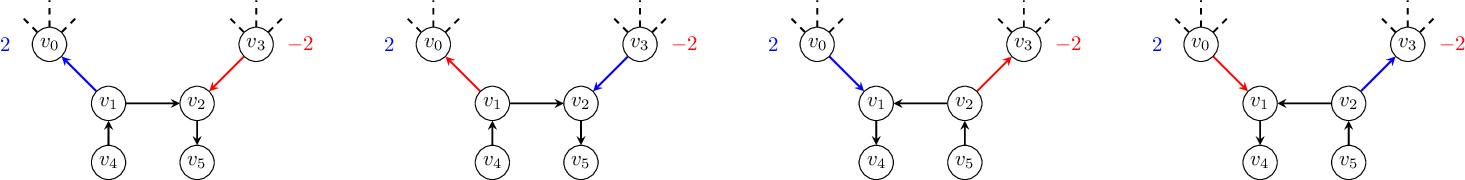

## S5 Proof of Claim 5

Considered configurations):

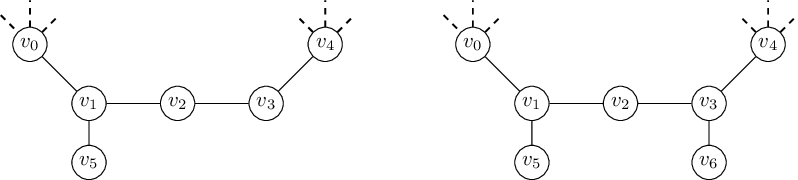

In [39]:
    for edgelist in [[(0, 1), (3, 4), (1, 2), (2, 3), (1, 5)], [(0, 1), (3, 4), (1, 2), (2, 3), (1, 5), (3, 6)]]:
        edges_D5 = [(0, 1), (3, 4)]

        for o_01, o_34, c_01, c_34, br_0, br_4 in itertools.product([-1, 1], [-1, 1], ['b', 'r'], ['b', 'r'],
                                                                    range(-3, 5), range(-3, 5)):

            # create a dict which stores the considered color degrees of 0 and 4 in D'

            br_D_prime = dict()

            if c_01 == 'b':
                br_D_prime[0] = [br_0, 0]
                br_D_prime[1] = [-1 * o_01, 0]
            else:
                br_D_prime[0] = [0, br_0]
                br_D_prime[1] = [0, -1 * o_01]

            if c_34 == 'b':
                br_D_prime[4] = [br_4, 0]
                br_D_prime[3] = [o_34, 0]
            else:
                br_D_prime[4] = [0, br_4]
                br_D_prime[3] = [0, o_34]

            # rule out colorings of D' which are not strong locally irregular

            if (c_01 == 'b' and br_D_prime[0][0] == br_D_prime[1][0]) or (
                    c_01 == 'r' and br_D_prime[0][1] == br_D_prime[1][1]) \
                    or (c_34 == 'b' and br_D_prime[3][0] == br_D_prime[4][0]) or (
                    c_34 == 'r' and br_D_prime[3][1] == br_D_prime[4][1]):
                continue

            # iterate through every possible orientation of the remaining edges,
            # and search for a coloring which satisfies the strong locally irregular condition,
            # while considering the color degrees of 0, 1, 3, and 4 in D'

            for o in itertools.product([-1, 1], repeat=len(edgelist) - 2):

                has_suitable_coloring = False

                for c_rest in itertools.product(['b', 'r'], repeat=len(edgelist) - 2):

                    if is_strong_locally_irregular(edgelist, dict(zip(edgelist, [o_01, o_34] + list(o))),
                                                   dict(zip(edgelist, [c_01, c_34] + list(c_rest))), edges_D5,
                                                   br_D_prime):
                        has_suitable_coloring = True
                        break

                if not has_suitable_coloring:
                    print("I found a case that I cannot solve:")
                    print("Edges: " + str(edgelist))
                    print("Orientation: " + str(dict(zip(edgelist, [o_01, o_34] + list(o)))))
                    print("Colors of (0,1) and (2,3): " + str(c_01) + ", " + str(c_34))
                    print("Color degrees of 0 and 3: " + str(br_0) + ", " + str(br_4))
                    print()

    print("I finished.")

I finished.


## S6 Proof of (ii)

**Notes:**
- $x$, $v_1$, $v_2$, and $y$ are represented by `0`, `1`, `2`, and `3`, respectively
- pendant neighbor of `1` (if it exists) is `4`
- pendant neighbor of `2` (if it exists) is `5`
- pendant neighbors of $x$ are represented by `6, 7, ...`  
- as in the previous proofs, edges as stored as ordered pairs `(u,v)` where `u<v`
- `edgelist` always starts with the edge `(0,3)` which is the only edge of `edges_D_prime`
- we consider three major cases, see the following figure

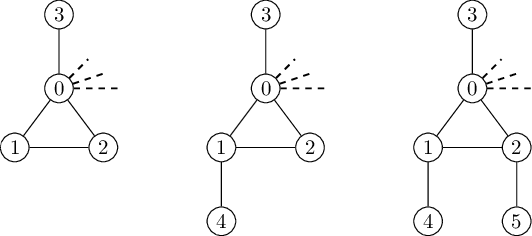>

In [40]:
edges_D_prime = [(0,3)]

for edgelist in [[(0,3),(0,1),(1,2),(0,2)],[(0,3),(0,1),(1,2),(0,2),(1,4)],[(0,3),(0,1),(1,2),(0,2),(1,4),(2,5)]]:
    
    # consider every interesting number of pendant neighbors of 0
    # we know that 0 is incident to at most 6 pendant edges
    
    for q in range(7):
        
        edgelist.append((0,6+q))
        
        # w.l.o.g. the arc between 0 and 3 in D' is colored blue
    
        c_03 = 'b'
            
        # consider different blue degrees blue_3 of 3 in D'
        # and the orientation of the edge (0,3)
        # note: any solution that works for blue_3 = 4 + q works also for blue_3 > 4 + q and blue_3 < -(3 + q)
        # as the blue balanced degree of 0 is upper bounded by d(0) = 3 + q
        
        for blue_3, o_03 in itertools.product(range(-3-q,5+q),[-1,1]):
            
            br_D_prime = {0:[o_03,0], 3:[blue_3,0]}
           
            # if the coloring of D' is not strong locally irregular, skip it
                
            if br_D_prime[0][0] == br_D_prime[3][0]:
                continue
            
            # consider every possible orientation of edges incident to 1 and 2
            # and every possible number of pendant arcs ingoing to 0
            
            for o_incident_to_1_or_2, number_ingoing_pendant_arcs_from_0 in itertools.product(itertools.product([-1,1],repeat=len(edgelist)-q-1), range(q+1)):
               
                o = dict(zip(edgelist, [o_03] + list(o_incident_to_1_or_2) + [-1 for i in range(number_ingoing_pendant_arcs_from_0)] + [1 for i in range(q - number_ingoing_pendant_arcs_from_0)]))
                
                has_suitable_coloring = False
                
                for c in itertools.product(['b','r'], repeat = len(edgelist)):
                    
                    if is_strong_locally_irregular(edgelist,o,dict(zip(edgelist,[c_03] + list(c))), edges_D_prime, br_D_prime):
                        has_suitable_coloring = True
                        break
                
                if not has_suitable_coloring:
                    print("I found a case that I cannot solve:")
                    print("Edges: " + str(edgelist))
                    print("Orientation: " + str(o))
                    print("Blue degree 3: " + str(blue_3))
                    print()
                    

print("I finished.")

I finished.
